In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [2]:
# Function to rebin the data. 
# INPUT: bins_div (# of new bins), bins (original bin data), counts (values for each original bin), threshold (maximum
#        energy value, x axis)
# OUTPUT: rebinned_bins (new bins), rebinned_counts(new counts for each new bin created)

def rebin(bins_div, bins, counts, threshold):
    rebin_bins = []
    rebin_counts = []

    for bini, count in zip(bins, counts):
        if bini <= threshold:
            rebin_bins.append(bini)
            rebin_counts.append(count)

    rebin_bins = np.array(rebin_bins)
    rebin_bins = rebin_bins.reshape(bins_div, int(len(rebin_bins)/bins_div))

    rebin_counts = np.array(rebin_counts)
    rebin_counts = rebin_counts.reshape(bins_div, int(len(rebin_counts)/bins_div))

    rebinned_counts = np.sum(rebin_counts, axis=1)

    rebinned_bins = []
    for i in range(len(rebin_bins)): 
        rebinned_bins.append(rebin_bins[i][-1])
        
    return rebinned_bins, rebinned_counts


In [12]:
# Function to reproduce combined plots for different initial energies of the source at different scintillators
# channels
# INPUTS: particle (name of the folder of particle), source (name of the source of the particle), max_energy (upper
#         limit of the energy, x axis, for the plots)
# OUTPUTS: plots of each scintillator for different energies combined in one single PDF file

def combined_plots(particle, source, max_energy):
    bin_file = "{}/{}/100-MeV/EDep1-Scint1-2.txt".format(particle, source)
    bins = np.array(pd.read_csv(bin_file, header=None, sep=";")[0])

    energy_names = ["100-MeV", "200-MeV", "300-MeV", "400-MeV", "500-MeV", "700-MeV", "1-GeV", "2-GeV"]
    c = ["firebrick", "blue", "blue", "green", "blue", "green"]
    scints = ["Scint - 1", "Scint - 2", "Scint - 2", "Scint - 3", "Scint - 2", "Scint - 3"]
    titles = ["Coincidence Scint 1-2", "Coincidence Scint 1-2-3", "Coincidence Scint 1-2-3-4"]

    for name in energy_names:
        fig, axes = plt.subplots(1,3)

        edep_ls = ["EDep1-Scint1-2", "EDep2-Scint1-2", "EDep2-Scint1-2-3", "EDep3-Scint1-2-3",
                    "EDep2-Scint1-2-3-4", "EDep3-Scint1-2-3-4"]

        fig.suptitle("{}".format(name), fontsize = 18)
        for i in range(0,3):
            edep_1_name = "{}/{}/{}/{}.txt".format(particle, source, name, edep_ls[2*i])

            edep_2_name = "{}/{}/{}/{}.txt".format(particle, source, name, edep_ls[2*i+1])

            edep_1 = np.array(pd.read_csv(edep_1_name, header=None, sep=";")[1])
            edep_2 = np.array(pd.read_csv(edep_2_name, header=None, sep=";")[1])

            axes[i].set_xlim([0, max_energy])

            axes[i].set_xlabel("Energy (MeV)", fontsize=14)
            axes[i].set_ylabel("Counts", fontsize=14)

            axes[i].tick_params(axis='both', which='major', labelsize=14)
            axes[i].tick_params(axis='both', which='major', labelsize=14)

            axes[i].plot(bins, edep_1, "--o", color = c[2*i], label = scints[2*i])
            axes[i].plot(bins, edep_2, "--o", color = c[2*i+1], label = scints[2*i + 1])

            axes[i].set_title(titles[i], fontsize = 14)
            axes[i].legend(loc=(0.725,0.85), fontsize = 14)

        fig.set_size_inches(22.5, 6.5)
        fig.tight_layout()

    def save_multi_image(filename):
        pp = PdfPages(filename)
        fig_nums = plt.get_fignums()
        figs = [plt.figure(n) for n in fig_nums]
        for fig in figs:
            fig.savefig(pp, format='pdf')
        pp.close() 
    
    output = "{}_{}".format(particle, source)
    filename = "plots/coincidence_plots/{}.pdf".format(output)
    save_multi_image(filename)

# Combined plots

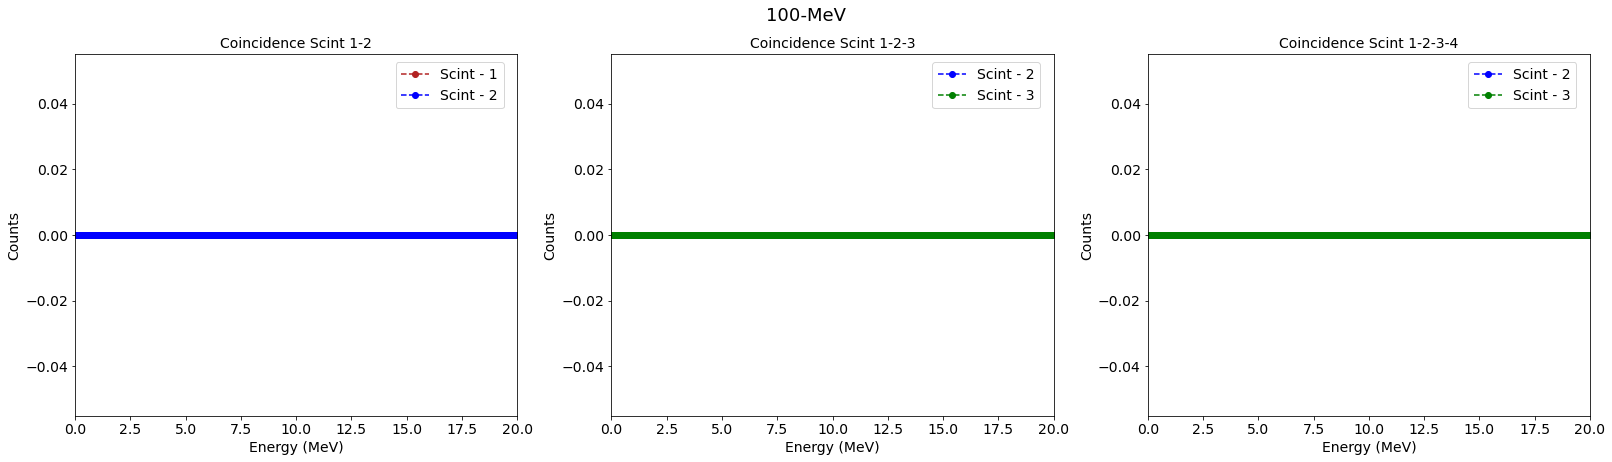

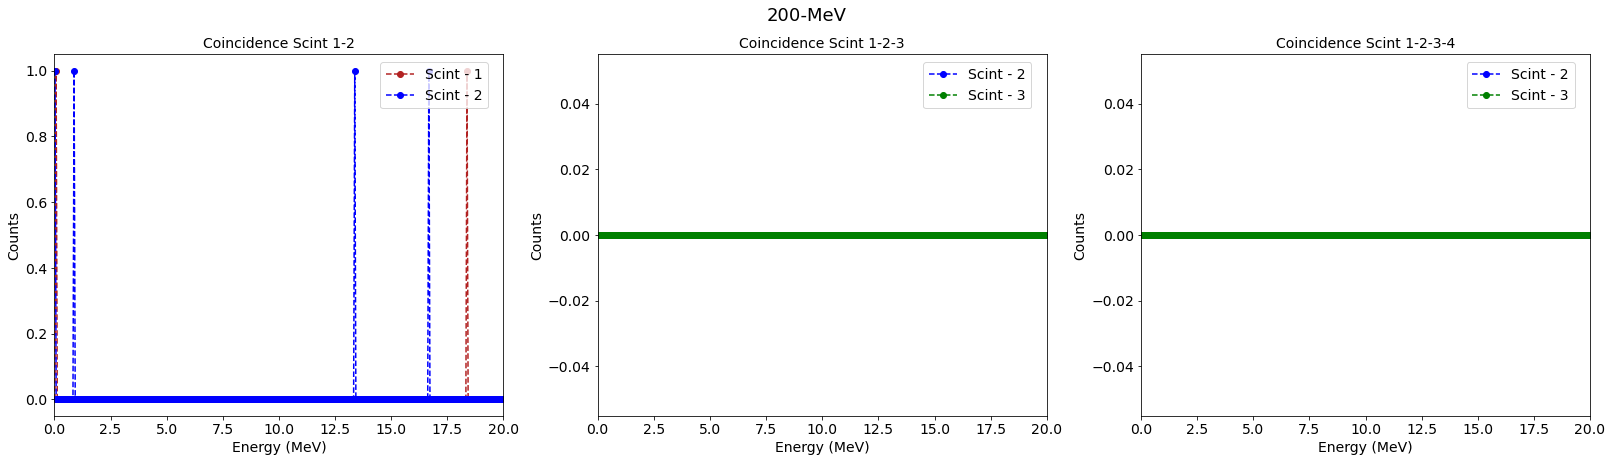

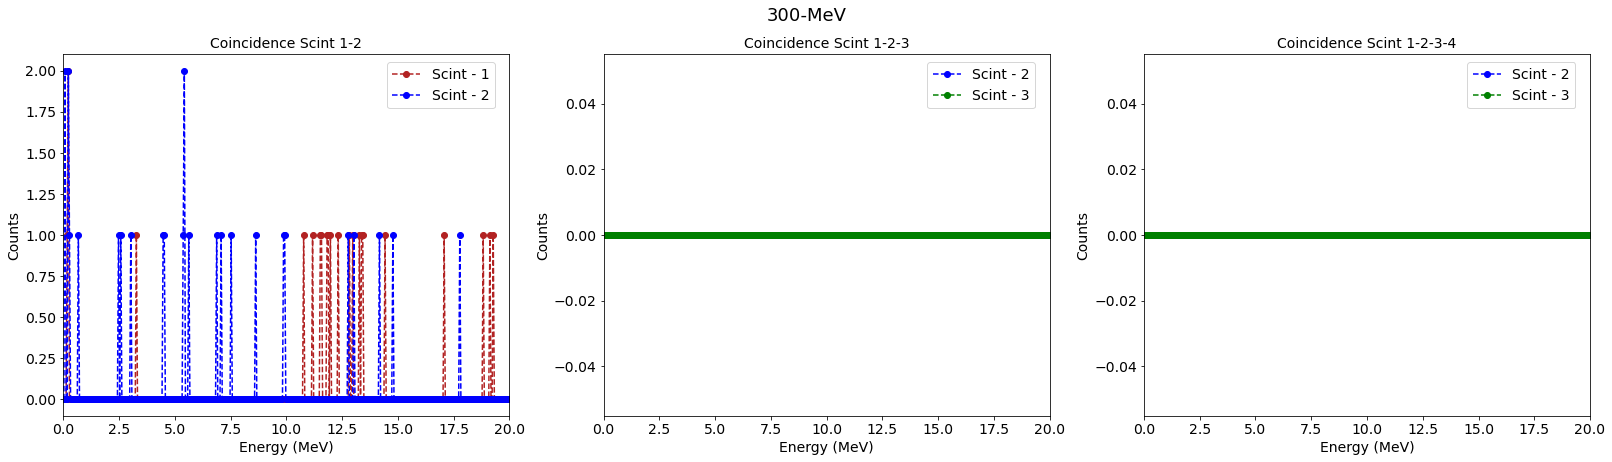

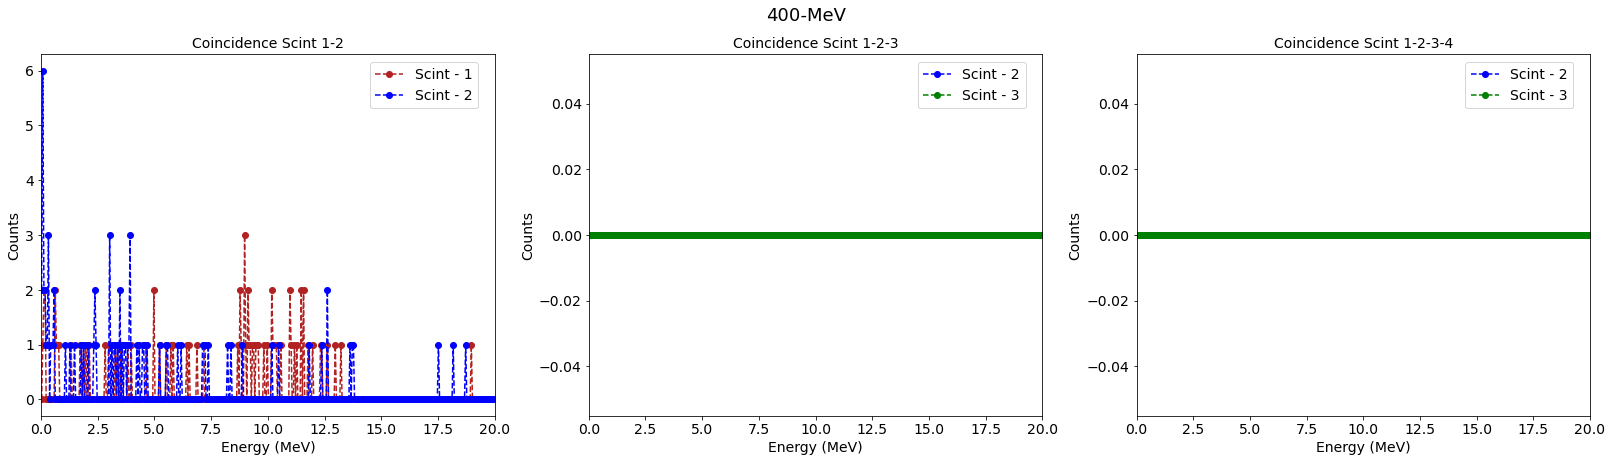

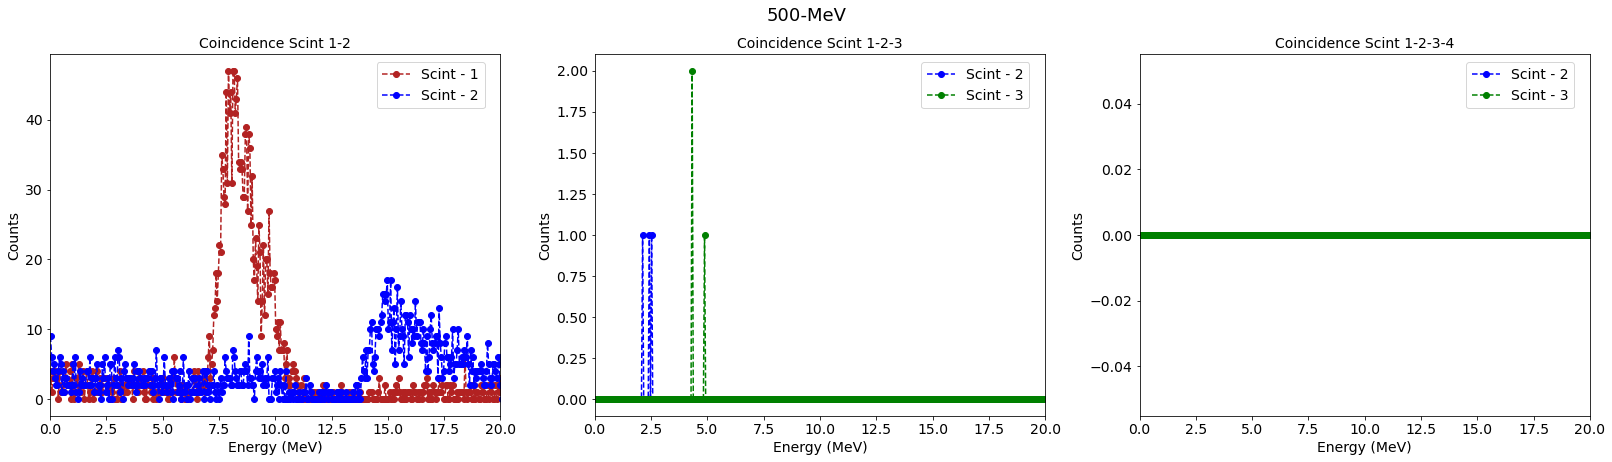

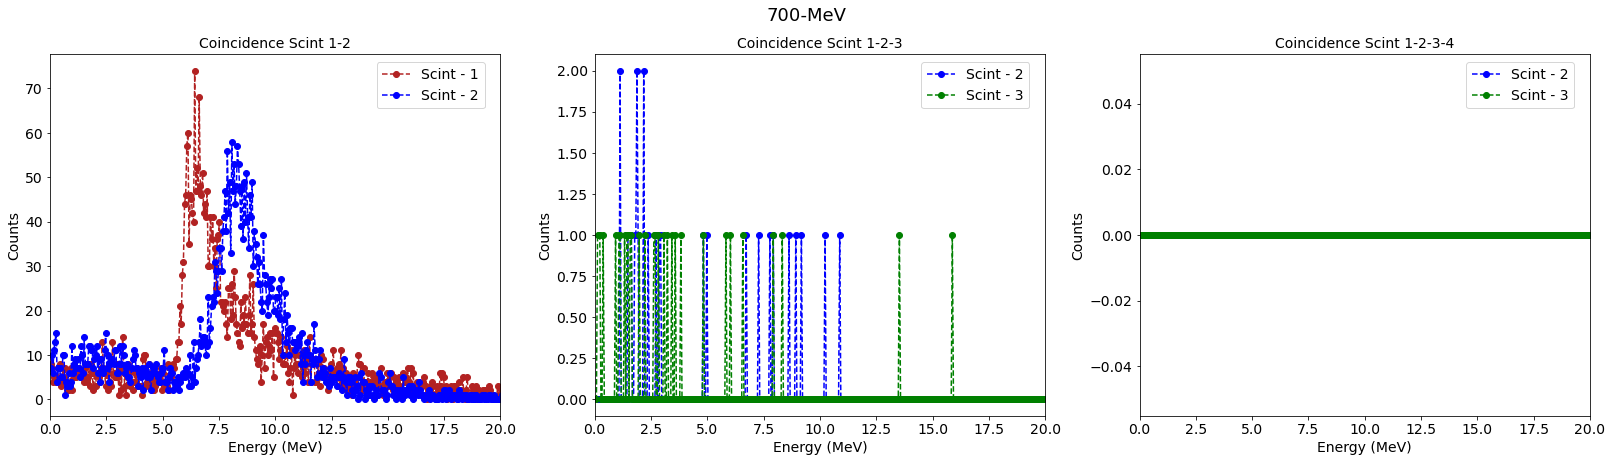

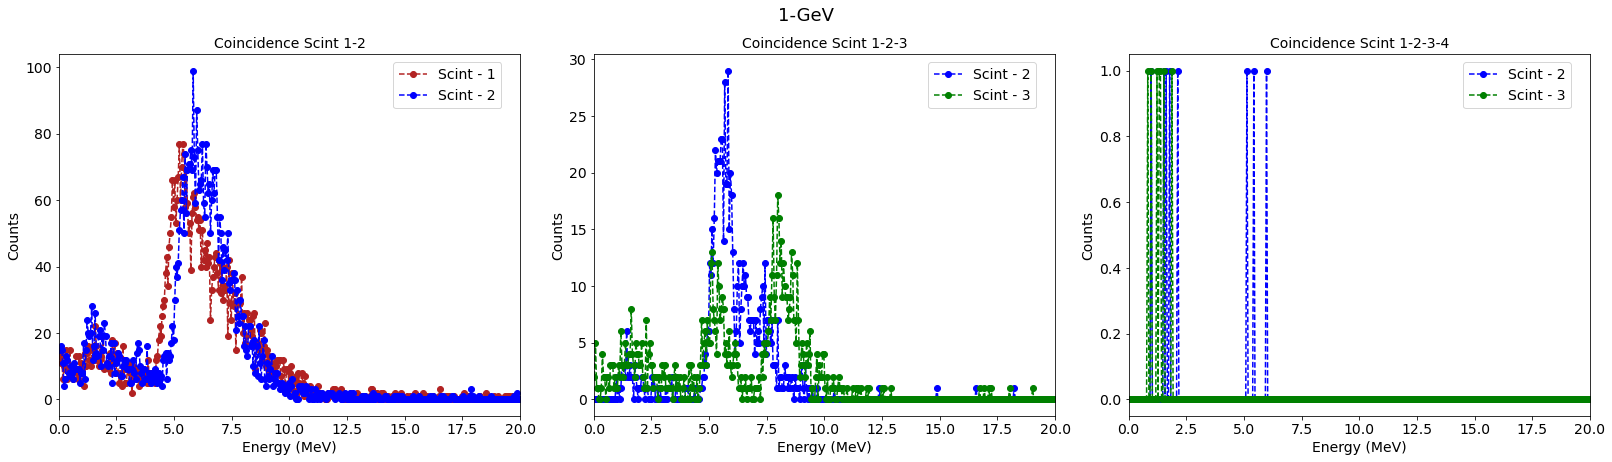

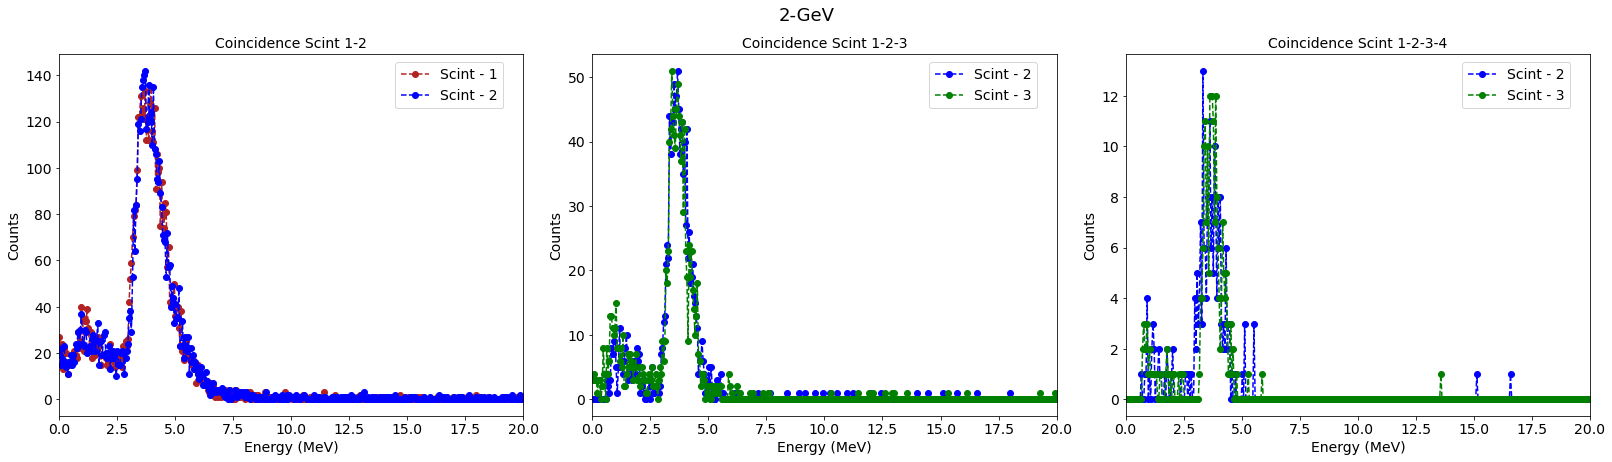

In [22]:
particle = "he_4"
source = "isotropic_flux"
max_energy = 20
combined_plots(particle, source, max_energy)

# HISTOGRAMS

In [26]:
# Function that generates combined histograms of of different initial energy sources
# INPUT: particle (name of the particle's folder), source (name of the source of the particle), txtfile (output file
#        name of the txt file), bins_div (# of new bins), threshold (maximum energy value, x axis)

def combined_histograms(particle, source, txtfile, bins_div, threshold):
    energies = ["200-MeV", "300-MeV", "400-MeV", "500-MeV", "700-MeV", "1-GeV", "2-GeV"]
    names = ["200 MeV", "300 MeV", "400 MeV", "500 MeV", "700 MeV", "1 GeV", "2 GeV"]

    fig, ax = plt.subplots(1,1)
    colors = ["firebrick", "blue", "green", "purple", "black", "orange", "darkblue"]

    i = 0
    for energy in energies:
        bin_file = "{}/{}/100-MeV/{}.txt".format(particle, source, txtfile)
        bins = np.array(pd.read_csv(bin_file, header=None, sep=";")[0])

        edep_1_name = "{}/{}/{}/{}.txt".format(particle, source, energy, txtfile)

        edep_1 = np.array(pd.read_csv(edep_1_name, header=None, sep=";")[1])
        
        bins, edep_1 = rebin(bins_div, bins, edep_1, threshold)

        ax.set_xlim([0, threshold])

        ax.set_xlabel("Energy (MeV)", fontsize=18)
        ax.set_ylabel("Counts", fontsize=18)

        ax.tick_params(axis='both', which='major', direction = "out", labelsize=18, size = 12)

        legend = "{}".format(names[i])
        ax.step(bins, edep_1, linestyle = "-", linewidth = 1.5, color = colors[i], label = legend)

        ax.legend(loc="upper right", fontsize = 14)

        i += 1

    fig.set_size_inches(10.5, 4.5)
    fig.tight_layout()
    
    output = "{}_{}_{}".format(particle, source, txtfile)
    fig.savefig("plots/ICRC_plots/PDF/{}.pdf".format(output))
    fig.savefig("plots/ICRC_plots/JPG/{}.jpg".format(output))
    plt.show()

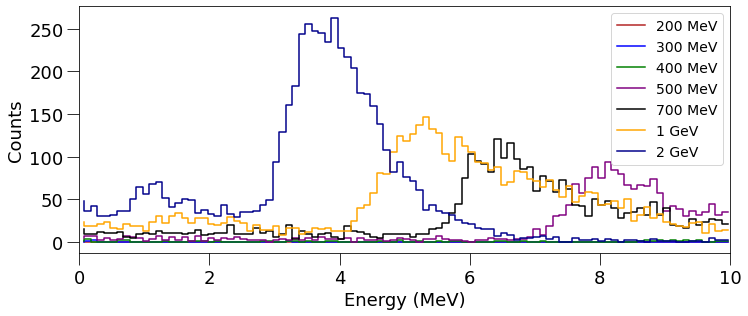

In [46]:
particle = "he_4"
source = "isotropic_flux"
txtfile = "EDep1-Scint1-2"
bins_div = 100
threshold = 10
combined_histograms(particle, source, txtfile, bins_div, threshold)